In [1]:
pip install scipy statsmodels


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 44.1/44.1 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 7.1 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 7.2 MB/s eta 0:00:00


In [2]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 랜덤 데이터 생성 (3개의 그룹, 각 그룹당 20개의 데이터)
np.random.seed(0)
group1 = np.random.normal(50, 10, 20)
group2 = np.random.normal(55, 10, 20)
group3 = np.random.normal(60, 10, 20)

# 모든 데이터를 하나의 배열로 합치고, 그룹 라벨을 생성
data = np.concatenate([group1, group2, group3])
labels = ['group1']*len(group1) + ['group2']*len(group2) + ['group3']*len(group3)

# 일원분산분석 (One-way ANOVA)
f_stat, p_val = stats.f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat}, p-value: {p_val}")

# p-value가 0.05보다 작다면, 사후분석을 수행
if p_val < 0.05:
    print("Performing Tukey's HSD...")
    tukey = pairwise_tukeyhsd(data, labels, alpha=0.05)
    print(tukey)

F-statistic: 0.012653190858039693, p-value: 0.9874292968858848


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

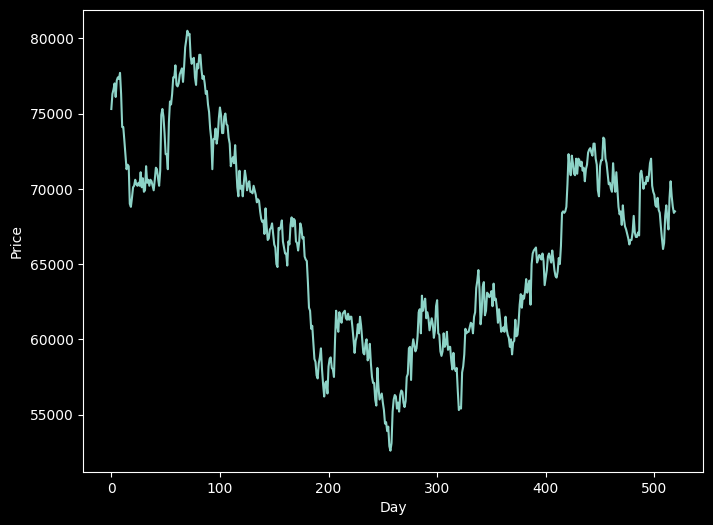

In [11]:
import matplotlib.pyplot as plt
from urllib.request import *
from bs4 import *
plt.style.use('dark_background')

def stockprice(company_code,period):

    pList = list()
    DN = period
    PN = DN // 20
    if DN > PN * 20 :
        PN += 1

    for i in range(1,PN+1) :
        url = 'http://finance.naver.com/item/frgn.nhn?code='+company_code+'&page=' + str(i)
        req = Request(url)
        req.add_header('User-Agent','Mozilla/5.0')
        wp = urlopen(req)
        soup = BeautifulSoup(wp, 'html.parser')
        trList = soup.find_all('tr',{'onmouseover':'mouseOver(this)'})

        for n in trList :
            tdList = n.find_all('td')
            price = tdList[1].get_text()
            price = price.replace(',','')
            pList.append(int(price))
            
    pList.reverse()
    return pList

if __name__ == "__main__": 
    period = 520                                               #input period
    Pricedata = stockprice('005930',period)             #(company_code, period)
    plt.figure(figsize = (8,6))
    plt.plot(Pricedata[-1*period:])
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.grid(b=True, color='DarkTurquoise', alpha=0.3, linestyle=':', linewidth=2)

In [10]:
import pandas as pd
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup

def stockprice(company_code, period):
    pList = list()
    dateList = list()
    DN = period
    PN = DN // 20
    if DN > PN * 20:
        PN += 1

    for i in range(1, PN+1):
        url = f'http://finance.naver.com/item/frgn.nhn?code={company_code}&page={i}'
        req = Request(url)
        req.add_header('User-Agent', 'Mozilla/5.0')
        wp = urlopen(req)
        soup = BeautifulSoup(wp, 'html.parser')
        trList = soup.find_all('tr', {'onmouseover': 'mouseOver(this)'})

        for n in trList:
            tdList = n.find_all('td')
            date = tdList[0].get_text()
            price = tdList[1].get_text()
            price = price.replace(',', '')
            dateList.append(date)
            pList.append(int(price))

    dateList.reverse()
    pList.reverse()

    # 데이터프레임 생성
    df = pd.DataFrame({
        'Date': dateList,
        'Price': pList
    })

    # 엑셀로 저장
    df.to_excel("samsung_stock_price.xlsx", index=False)

if __name__ == "__main__":
    period = 500  # 원하는 기간 설정
    stockprice('005930', period)  # (회사 코드, 기간)

In [12]:
def get_krx_code(market=None):
    market_type = ''
    if market == 'kospi':
        market_type = '&marketType=stockMkt'
    elif market == 'kosdaq':
        market_type = '&marketType=kosdaqMkt'
    elif market == 'konex':
        market_type = '&marketType=konexMkt'
        
    url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13{0}'.format(market_type)
    stock_code = pd.read_html(url, header = 0)[0]
    stock_code['종목코드'] = stock_code['종목코드'].map('{:06d}'.format)
    stock_code = stock_code[['회사명', '종목코드', '업종', '상장일']]
    stock_code = stock_code.rename(columns = {'회사명': 'name', '종목코드': 'code', '업종': 'sectors',
                                              '상장일': 'listing_date'})
    stock_code['listing_date'] = pd.to_datetime(stock_code['listing_date'])
    
    return stock_code

In [13]:
def get_stock_price(code, num_of_pages, sort_date = True):
    url = f"http://finance.naver.com/item/sise_day.nhn?code={code}"
    headers = {'User-agent': 'Mozilla/5.0'} 
    bs = BeautifulSoup(requests.get(url=url, headers = headers).text, 'html.parser')
    pgrr = bs.find("td", class_="pgRR")
    last_page = int(pgrr.a["href"].split('=')[-1])
    
    pages = min(last_page, num_of_pages) # 마지막 페이지와 가져올 페이지 수 중에 작은 값 선택
    df = pd.DataFrame()

    for page in range(1, pages+1):
        page_url = '{}&page={}'.format(url, page)
        df = df.append(pd.read_html(requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}).text)[0])
        
    df = df.rename(columns={'날짜':'date','종가':'close','전일비':'diff'
                ,'시가':'open','고가':'high','저가':'low','거래량':'volume'}) #영문으로 컬럼명 변경
    df['date'] = pd.to_datetime(df['date']) 
    df = df.dropna()
    df[['close', 'diff', 'open', 'high', 'low', 'volume']] = \
                            df[['close','diff', 'open', 'high', 'low', 'volume']].astype(int) # int형으로 변경
    df = df[['date', 'open', 'high', 'low', 'close', 'diff', 'volume']] # 컬럼 순서 정렬
    df = df.sort_values(by = 'date') # 날짜순으로 정렬
    
    if sort_date:
        df = df.reset_index(drop = True)
    
    return df

In [14]:
item_name = '삼성전자'
stock = get_krx_code().query("name=='{}'".format(item_name))['code'].to_string(index=False) 

In [15]:
df = get_stock_price(stock, 10)
df.head()

AttributeError: 'DataFrame' object has no attribute 'append'

In [21]:
from urllib.request import Request, urlopen
from urllib.parse import quote
from bs4 import BeautifulSoup
import re  # 정규 표현식을 사용하기 위한 모듈

def find_stock_code(company_name):
    try:
        # 네이버 금융 검색 URL 설정
        base_url = 'https://finance.naver.com/search/searchList.naver?query='
        query = quote(company_name)  # URL 인코딩
        search_url = f"{base_url}{query}"
        
        # HTML 페이지 요청 및 수신
        req = Request(search_url)
        req.add_header('User-Agent', 'Mozilla/5.0')
        wp = urlopen(req)
        
        # BeautifulSoup 객체 생성
        soup = BeautifulSoup(wp, 'html.parser')
        
        # HTML 파싱: a 태그 중에서 첫 번째 것을 찾습니다.
        tag = soup.find('a', href=re.compile("^/item/main.naver?code="))
        
        # 종목코드 추출
        if tag:
            href = tag['href']
            code = re.search(r'code=([0-9]+)', href).group(1)  # 정규 표현식으로 code 파라미터 추출
            return code
        else:
            print("종목코드를 찾을 수 없습니다.")
            return None  # 종목코드를 찾을 수 없을 경우 None 반환
    except Exception as e:
        print(f"오류가 발생했습니다: {e}")
        return None

# 사용자로부터 종목명을 입력받습니다.
company_name = input("종목명을 입력하세요: ")

# 종목코드를 찾습니다.
company_code = find_stock_code(company_name)

# 결과를 출력합니다.
if company_code:
    print(f"{company_name}의 종목코드는 {company_code}입니다.")
else:
    print(f"{company_name}의 종목코드를 찾을 수 없습니다.")

종목명을 입력하세요: 삼성전자
종목코드를 찾을 수 없습니다.
삼성전자의 종목코드를 찾을 수 없습니다.


In [22]:
from urllib.parse import quote

print(quote('삼성전자'))

%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90


In [26]:
from urllib.request import Request, urlopen
from urllib.parse import quote
from bs4 import BeautifulSoup
import re  # 정규 표현식을 사용하기 위한 모듈

def find_stock_code(company_name):
    # 네이버 금융 검색 URL 설정
    base_url = 'https://finance.naver.com/search/searchList.naver?query='
    query = quote(company_name, encoding='euc-kr')  # EUC-KR로 URL 인코딩
    search_url = f"{base_url}{query}"
    
    # HTML 페이지 요청 및 수신
    req = Request(search_url)
    req.add_header('User-Agent', 'Mozilla/5.0')
    wp = urlopen(req)
    
    # BeautifulSoup 객체 생성
    soup = BeautifulSoup(wp, 'html.parser')

    # HTML 파싱: <span> 태그 중에서 클래스 이름이 'num _au_real_list'인 것을 찾습니다.
    span_tag = soup.find('span', {'class': 'num _au_real_list'})

    # 종목코드 추출
    if span_tag:
        code = span_tag.text  # <span> 태그 안의 텍스트를 가져옵니다.
        return code
    else:
        return None  # 종목코드를 찾을 수 없을 경우 None 반환

# 사용자로부터 종목명을 입력받습니다.
company_name = input("종목명을 입력하세요: ")

# 종목코드를 찾습니다.
company_code = find_stock_code(company_name)

# 결과를 출력합니다.
if company_code:
    print(f"{company_name}의 종목코드는 {company_code}입니다.")
else:
    print(f"{company_name}의 종목코드를 찾을 수 없습니다.")

종목명을 입력하세요: 삼성전자
삼성전자의 종목코드는 @code@입니다.


In [24]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re

def find_stock_code_using_selenium(company_name):
    # WebDriver 객체 생성
    driver = webdriver.Chrome(executable_path='[여기에 chromedriver의 경로를 적어주세요]')
    
    # 네이버 금융 페이지 열기
    driver.get('https://finance.naver.com/')
    
    # 검색창 WebElement 객체 가져오기
    search_box = driver.find_element_by_id('stock_items')
    
    # 검색창에 회사 이름 입력
    search_box.send_keys(company_name)
    
    # 검색 결과가 나올 때까지 잠시 대기
    time.sleep(1)
    
    # 자동완성 목록에서 첫 번째 결과 WebElement 객체 가져오기
    first_result = driver.find_element_by_xpath('//*[@id="atcmp"]/div[1]/div/ul/li[1]/a/span[1]')
    
    # WebElement 객체에서 종목코드 추출
    link = first_result.get_attribute('onclick')
    code = re.search(r'\'([0-9]+)\'', link).group(1)
    
    # WebDriver 종료
    driver.quit()
    
    return code

# 사용자로부터 종목명을 입력받습니다.
company_name = input("종목명을 입력하세요: ")

# 종목코드를 찾습니다.
company_code = find_stock_code_using_selenium(company_name)

# 결과를 출력합니다.
if company_code:
    print(f"{company_name}의 종목코드는 {company_code}입니다.")
else:
    print(f"{company_name}의 종목코드를 찾을 수 없습니다.")
